# Müşteri Deneyimi Veri Analizi Bitirme Projesi

Bitirme projesi kapsamında sunulan veri setlerinden "Customer Experience Dataset" adlı veri seti analiz edilmiştir.
Amaç, istatistiksel özet çıkarımı, eksik değer analizi, aykırı değer tespiti ve uygun görselleştirmeler ile eğitim boyunca öğrenilenler ile veri  analizi becerilerini geliştirmektir.

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/customer_experience_data.csv")

## 1. Veri Seti Genel Tanıtımı

Veri seti, 1000 müşteri gözlemi ve 14 değişken içermektedir. Bu değişkenler müşteri profili, etkileşim sayısı, memnuniyet düzeyi gibi bilgileri içermektedir.

Aşağıda veri setinin ilk 5 satırı ve genel yapısı verilmiştir.


In [ ]:
print("***Veri Seti Genel Bakış***\n")
print("\nVeri Seti İlk 5 Satır:\n")
print(df.head())
print("\nVeri Boyutu:\n")
print( df.shape)
print("\nVeri Tipleri ve Eksik Değerler:\n")
print(df.info())
print("\nSayısal Özet:\n")
print(df.describe(include='all'))

***Veri Seti Genel Bakış***


Veri Seti İlk 5 Satır:

   Customer_ID  Age  Gender  Location  Num_Interactions  Feedback_Score  \
0            1   56    Male     Urban                11               4   
1            2   69    Male  Suburban                10               3   
2            3   46    Male     Urban                 5               5   
3            4   32  Female  Suburban                 5               1   
4            5   60    Male     Urban                14               5   

   Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
0                  18               38           18.319606   
1                   2               17            9.015198   
2                  11               46           45.921572   
3                   6               13           44.105053   
4                   8               46           17.897471   

   Satisfaction_Score Retention_Status  Gender_Encoded  Location_Encoded  \
0                   7         Retained        

## 2. İstatistiksel Özet

Veri setindeki sayısal değişkenlerin merkezi eğilim (ortalama, medyan), dağılım ölçüleri (standart sapma, min, max) ve çeyrek değerleri hesaplanmıştır.


In [ ]:
# Sadece sayısal sütunlar
numerical_df = df.select_dtypes(include=["int64", "float64"])

# describe() ile temel istatistikler
summary = numerical_df.describe().T

# Medyan ve çeyrekleri ekleyelim
summary["median"] = numerical_df.median()
summary["Q1 (25%)"] = numerical_df.quantile(0.25)
summary["Q3 (75%)"] = numerical_df.quantile(0.75)

summary

,count,mean,std,min,25%,50%,75%,max,median,Q1 (25%),Q3 (75%)
Customer_ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000,500.500000,250.750000,750.250000
Age,1000.0,43.819000,14.991030,18.000000,31.000000,44.000000,56.000000,69.000000,44.000000,31.000000,56.000000
Num_Interactions,1000.0,7.545000,4.016978,1.000000,4.000000,8.000000,11.000000,14.000000,8.000000,4.000000,11.000000
Feedback_Score,1000.0,2.985000,1.418022,1.000000,2.000000,3.000000,4.000000,5.000000,3.000000,2.000000,4.000000
Products_Purchased,1000.0,10.417000,5.345623,1.000000,6.000000,11.000000,15.000000,19.000000,11.000000,6.000000,15.000000
Products_Viewed,1000.0,27.370000,12.939572,5.000000,17.000000,27.500000,38.000000,49.000000,27.500000,17.000000,38.000000
Time_Spent_on_Site,1000.0,32.274399,15.734978,5.114208,18.836771,32.455598,45.932524,59.947722,32.455598,18.836771,45.932524
Satisfaction_Score,1000.0,5.540000,2.904279,1.000000,3.000000,6.000000,8.000000,10.000000,6.000000,3.000000,8.000000
Gender_Encoded,1000.0,0.524000,0.499674,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
Location_Encoded,1000.0,1.032000,0.809711,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000


## 2.1. İstatistiksel Özet Yorumu

Aşağıda, veri setinde yer alan sayısal değişkenler için temel istatistiksel ölçümler (ortalama, medyan, min, max, çeyrekler) özetlenmiştir:

- **Age (Yaş)**:
  - Ortalama yaş 43.8, medyan 44 → yaş dağılımı oldukça dengeli.
  - Minimum yaş 18, maksimum 69 → geniş bir yaş aralığı var.
  - 25% ve 75% değerleri (31, 56) arasında kalan kullanıcılar çoğunlukta.

- **Num_Interactions (Etkileşim Sayısı)**:
  - Ortalama 7.54, medyan 8 → kullanıcıların çoğu 7-8 etkileşimde bulunmuş.
  - 14’e kadar çıkan kullanıcılar olabilir (muhtemelen aktif kullanıcılar).

- **Feedback_Score (Geri Bildirim Skoru)**:
  - Ortalama 2.98, medyan 3 → skorlar genel olarak 1–5 aralığında ve dengeli dağılmış.
  - Minimum: 1, Maksimum: 5 → sabit bir puanlama sistemi kullanılmış.

- **Products_Purchased (Satın Alınan Ürün)**:
  - Ortalama 10.41, medyan 11 → kullanıcılar ortalama 10–11 ürün satın almış.
  - Maksimum 19 → bazı kullanıcılar çok daha fazla satın alma yapmış olabilir.

- **Time_Spent_on_Site (Sitede Harcanan Süre)**:
  - Ortalama ≈ 32.3 dakika, medyan ≈ 32.5 dakika → normal dağılıma yakın.
  - Minimum 5 dakika, maksimum ≈ 60 dakika → bazı kullanıcılar çok kısa kalmış.

- **Satisfaction_Score (Memnuniyet Puanı)**:
  - Ortalama 5.54, medyan 6 → genel memnuniyet seviyesi orta seviyede.
  - Minimum 1, maksimum 10 → tam skala kullanılmış.

- **Gender_Encoded ve Location_Encoded**:
  - Gender_Encoded ortalaması 0.52 → kullanıcıların yaklaşık %52’si erkek.
  - Location_Encoded ortalaması 1.03 → farklı lokasyonlardan dengeli veri gelmiş.

- **Retention_Status_Encoded (Sadakat Durumu)**:
  - Ortalama ≈ 0.69 → kullanıcıların yaklaşık %69’u sistemde tutulmuş.

Bu istatistikler, hem kullanıcıların genel davranışları hem de modellemeye temel oluşturacak veri yapısı hakkında bilgi verir.


## 3. Eksik Değer Analizi

Bu bölümde, veri setindeki sütunlarda eksik değer (null) olup olmadığı kontrol edilmiştir.
Eksik veri olması durumunda, bu verilerin silinmesi, ortalama/medyan ile doldurulması veya tahminsel yöntemlerle tamamlanması gibi yöntemler değerlendirilecektir.


In [ ]:
# Her sütundaki eksik değer sayısını ve yüzdesi
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Eksik Değer Sayısı': missing,
    'Yüzde (%)': missing_percent
})

# Sadece eksik değeri olan sütunları filtreleme
missing_df = missing_df[missing_df["Eksik Değer Sayısı"] > 0]

missing_df

,Eksik Değer Sayısı,Yüzde (%)


## 3.1. Eksik Veri Analizi Sonuçları

Veri seti üzerinde yapılan eksik değer (null) analizi sonucunda, **hiçbir sütunda eksik gözlem bulunmadığı** tespit edilmiştir.Verinin temiz olduğunu ve doğrudan analiz veya modelleme çalışmalarına uygun olduğu gözlemlenmiştir.

## 4. Aykırı Değer (Outlier) Analizi

Veri setindeki sayısal değişkenlerde bulunan **aykırı (uç) değerler**, IQR (Interquartile Range) yöntemiyle analiz edilmiştir.

Aykırı değerler, veri setinde istatistiksel olarak olağan dışı olan gözlemler olarak tanımlanır. Bunlar, model performansını düşürebileceği için dikkatle analiz edilmelidir.

In [ ]:
# Sayısal sütunlar
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Aykırı değerlerin sayısını içeren tablo
outlier_summary = {}

# IQR yöntemiyle aykırı değer analizi
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        "Toplam Gözlem": df.shape[0],
        "Aykırı Değer Sayısı": outliers.shape[0],
        "Aykırı Değer Oranı (%)": round(outliers.shape[0] / df.shape[0] * 100, 2)
    }

# Sonuçları DataFrame olarak gösterme
import pandas as pd
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by="Aykırı Değer Oranı (%)", ascending=False)
outlier_df

,Toplam Gözlem,Aykırı Değer Sayısı,Aykırı Değer Oranı (%)
Customer_ID,1000.0,0.0,0.0
Age,1000.0,0.0,0.0
Num_Interactions,1000.0,0.0,0.0
Feedback_Score,1000.0,0.0,0.0
Products_Purchased,1000.0,0.0,0.0
Products_Viewed,1000.0,0.0,0.0
Time_Spent_on_Site,1000.0,0.0,0.0
Satisfaction_Score,1000.0,0.0,0.0
Gender_Encoded,1000.0,0.0,0.0
Location_Encoded,1000.0,0.0,0.0


## 4.1. Aykırı Değer Analizi Sonuçları

IQR (Interquartile Range) yöntemi ile yapılan aykırı değer analizi sonucunda, **hiçbir sayısal sütunda aykırı değer tespit edilmemiştir**.

Bu, veri setinin istatistiksel açıdan oldukça düzenli olduğunu ve analiz ya da modelleme öncesi aykırı değer temizliği yapılmasına gerek olmadığını göstermektedir.

Bu durum veri kalitesini artırır ve analiz sonuçlarının daha güvenilir olmasını sağlar.

## 4.2. Aykırı Değerlerin Görselleştirilmesi (Boxplot)

Aşağıdaki kutu grafiklerinde, her sayısal değişkenin dağılımı ve potansiyel aykırı değerleri görselleştirilmiştir. Boxplot (kutu grafiği), verinin medyanını, çeyreklerini ve uç değerlerini grafiksel olarak gösterir.

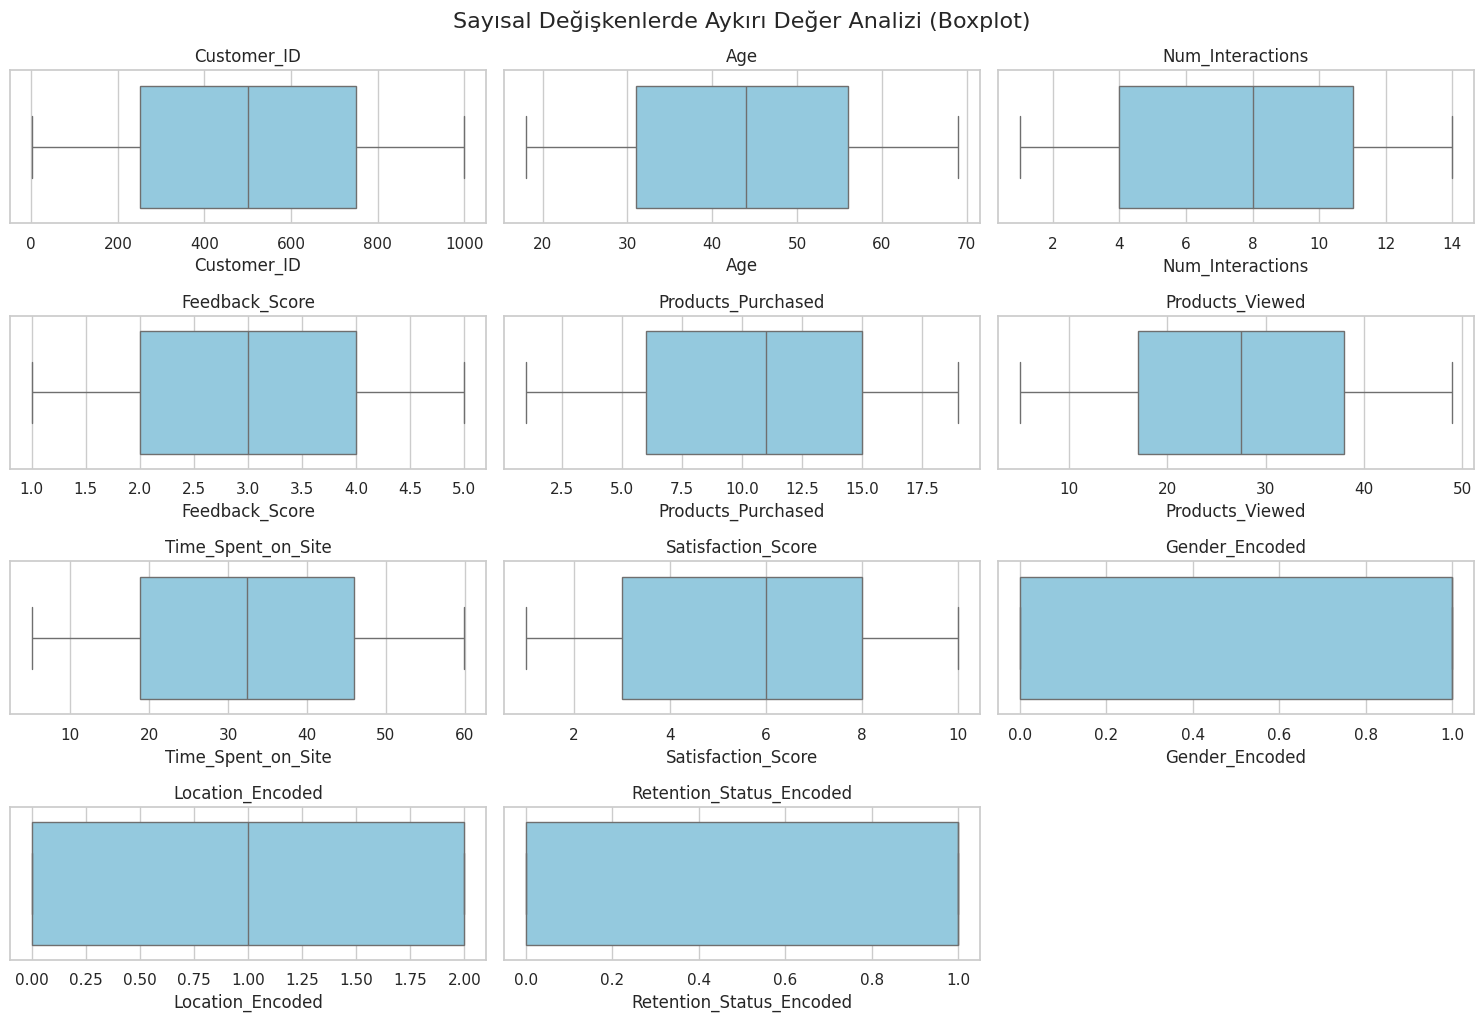

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutu
plt.figure(figsize=(15, 10))

# Sayısal değişkenleri döngüyle çiz
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Sayısal Değişkenlerde Aykırı Değer Analizi (Boxplot)", y=1.02, fontsize=16)
plt.show()

## 4.3. Aykırı Değerlerin Görsel İncelemesi

Aşağıdaki boxplot grafikleri, veri setindeki sayısal değişkenlerin dağılımını ve olası aykırı değerleri göstermektedir.

Her bir grafik, değişkenin medyanını, çeyrek değerlerini ve uç değerlerini açıkça görselleştirir.

### 📌 Yorum:
- Tüm sayısal değişkenlerde veri dağılımı oldukça dengelidir.
- **Hiçbir değişkende aykırı (uç) gözlem noktası bulunmamaktadır.**
- Bu durum, verinin istatistiksel olarak temiz olduğunu ve modelleme aşamasında uç değer kaynaklı bozulmalar yaşanmayacağını gösterir.

## 5. Veri Görselleştirme

Bu bölümde, veri setindeki sayısal ve kategorik değişkenlerin dağılımı görselleştirilmiştir.

- **Sayısal değişkenler** için histogram ve yoğunluk eğrileri (KDE) kullanılmıştır.
- **Kategorik değişkenler** için frekans grafikleri (countplot) kullanılmıştır.

Bu görseller, verinin genel yapısını anlamamıza, uç değerleri fark etmemize ve değişkenlerin dağılımı hakkında fikir edinmemize yardımcı olur.

### 5.1. Sayısal Değişkenlerin Dağılımı

Aşağıdaki histogramlar ve KDE eğrileri, veri setindeki sayısal değişkenlerin dağılımını göstermektedir:

- Çoğu değişken normal dağılıma yakın simetrik bir yapıya sahiptir.
- `Feedback_Score`, `Gender_Encoded`, `Location_Encoded` gibi bazı değişkenler kategorik özellik taşıdığından dolayı kesikli (discrete) yapılar göstermektedir.
- `Time_Spent_on_Site`, `Products_Purchased` gibi değişkenlerde dağılım dengeli görünmektedir.

Bu grafikler, modelleme öncesi verinin genel yapısını ve dağılım şeklini anlamamıza yardımcı olur.

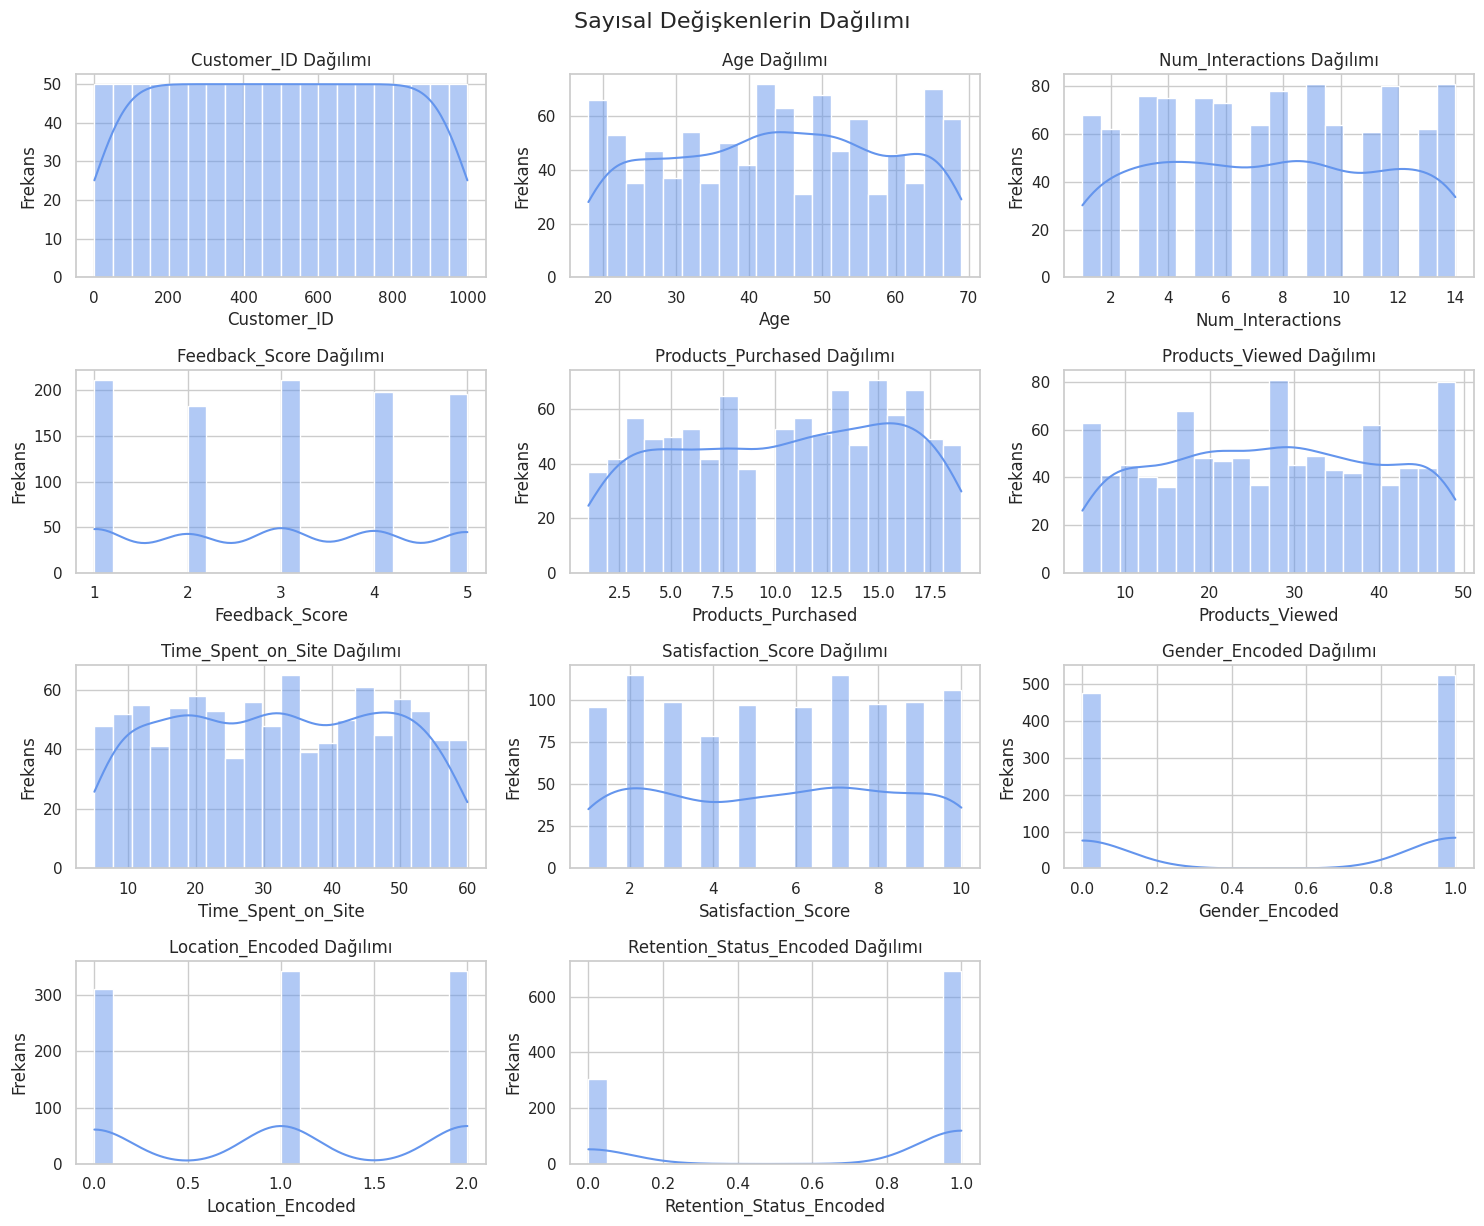

In [ ]:
# Histogram + KDE (Kernel Density Estimation)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='cornflowerblue')
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.tight_layout()

plt.suptitle("Sayısal Değişkenlerin Dağılımı", y=1.02, fontsize=16)
plt.show()

### 5.2. Kategorik Değişkenlerin Dağılımı

Kategorik değişkenler için sütun grafikleri kullanılarak frekans dağılımları görselleştirilmiştir:

- `Gender`: Erkek ve kadın dağılımı dengelidir (yaklaşık yarı yarıya).
- `Location`: Kullanıcılar Urban, Suburban ve Rural bölgeler arasında eşit dağılmıştır.
- `Retention_Status`: Retained (sitede kalan) kullanıcı sayısı, Churned (kaybedilen) kullanıcı sayısından belirgin şekilde fazladır.

Bu grafikler, veri setindeki kategorik dengesizliklerin fark edilmesine ve olası veri ön işleme ihtiyaçlarının tespit edilmesine katkı sağlar.

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['Gender', 'Location', 'Retention_Status']

/tmp/ipython-input-28-4113694770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-28-4113694770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-28-4113694770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


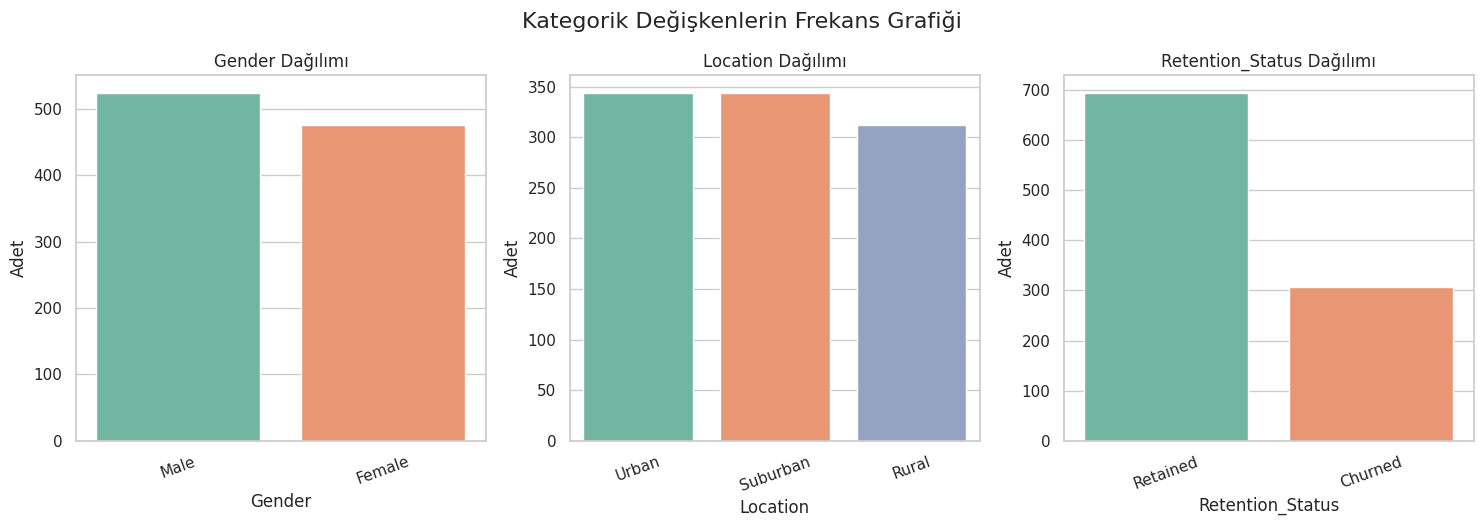

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"{col} Dağılımı")
    plt.ylabel("Adet")
    plt.xticks(rotation=20)
    plt.tight_layout()

plt.suptitle("Kategorik Değişkenlerin Frekans Grafiği", y=1.05, fontsize=16)
plt.show()

## 6. Sonuç ve Değerlendirme

Proje kapsamında, müşteri deneyimini ölçen bir veri seti üzerinde temel veri analizi adımları gerçekleştirilmiştir. Elde edilen bulgular aşağıda özetlenmiştir:

- **İstatistiksel Özet:** Sayısal değişkenler için ortalama, medyan, standart sapma gibi temel istatistikler hesaplanarak verinin merkezi eğilimleri ve dağılımları incelenmiştir.
- **Eksik Değer Analizi:** Veri setinde eksik değer bulunmamaktadır, bu nedenle herhangi bir doldurma veya veri silme işlemi uygulanmamıştır.
- **Aykırı Değer Analizi:** Boxplot ve IQR yöntemine dayalı analizler sonucunda aykırı değer gözlemlenmemiştir. Bu da verinin temiz ve analiz için uygun olduğunu göstermektedir.
- **Görselleştirme:** Sayısal değişkenler için histogram ve KDE eğrileri, kategorik değişkenler için sütun grafikler kullanılmıştır. Bu sayede kullanıcı davranışları, ürün etkileşimleri ve memnuniyet düzeyleri hakkında görsel içgörüler elde edilmiştir.

